# CA04 - Ensemble Models

## 1. Data Source and Contents
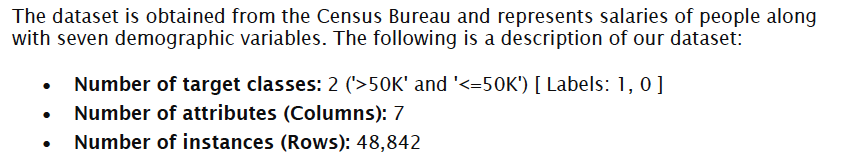

## Data Source:
Use the following exact “path” in your code as the data source:<br>
"https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true"

Training and Test Data: <br>
There is a column indicating the rows to be used as “Training Data”
and “Testing Data”. <br>
Programmatically create the Training and Testing datasets as separate dataframes in the code based on this column value.


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
# read the CSV

df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [3]:
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


In [4]:
# Look into the dataframe

print(df.shape)

(48842, 11)


In [5]:
# dataFrame statistics
df.describe(include = "all")

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [6]:
# Look into the type of the columns and look how many null values inside

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB
None


In [7]:
# Look into how many missing values the df has
df_num_missing = df.isna().sum()
df_num_missing

# no missing values

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [8]:
# check duplicates - too much 
df.duplicated().sum()

40012

In [9]:
# check stat of column "y"

df["y"].describe()

count    48842.000000
mean         0.239282
std          0.426649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [10]:
# get the names of all of the columns and get rid of the (a. b. c....)
# using a for loop to drop all the a. b. c. d. but not the columns flag and y
for column in df.drop(columns=["flag","y"]):   
    df[column] = df[column].str.split(".", n=1, expand = True)[1]

In [11]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0


In [12]:
# calculate the IQR of y
df_y_Q1 = df["y"].quantile(0.25)
df_y_Q3 = df["y"].quantile(0.75)
df_y_IQR = df_y_Q3 - df_y_Q1

In [13]:
print(f"The y IQR is: {df_y_IQR}")

The y IQR is: 0.0


In [14]:
# look into the upper limit and the lower limit of y
lower_lim = df_y_Q1 - 1.5 * df_y_IQR
upper_lim = df_y_Q3 + 1.5 * df_y_IQR

In [15]:
print(f"The y lower limit: {lower_lim} and the upper limit: {upper_lim}")

The y lower limit: 0.0 and the upper limit: 0.0


Look into what is inside each of the columns

In [16]:
# read the CSV as a copy of the df

new_df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [17]:
# import necessay encoding packages

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import time



#### OneHotEncoder

Another way to do encoding


In [18]:
train = new_df[new_df["flag"] == "train"].drop(["flag","education_num_bin"],axis = 1)
test = new_df[new_df["flag"] == "test"].drop(["flag","education_num_bin"], axis =1)

# Set up the Train data and Test data
X_train = train.drop("y", axis = 1)
y_train = train["y"]
                
X_test = test.drop("y", axis =1)
y_test = test["y"]
                
# create dummies for the categorical columns using OneHotEncoder
oh_encoder = OneHotEncoder()
X_train =oh_encoder.fit_transform(X_train).toarray()
X_test =oh_encoder.fit_transform(X_test).toarray()

# Measure the time for the model to run
start = time.time()

# Using pre-determined hyperparameters, set up the decision tree classifier
dtree = DecisionTreeClassifier(max_depth = 5, random_state = 23,
                               max_features = None, min_samples_leaf = 15)

# fit the model with the training set
dtree.fit(X_train, y_train)

# track the time spent when running the model
elapsed = time.time()-start

# creat y-pred 
y_pred = dtree.predict(X_test)

print(f"Time spent to train the model = {round(elapsed,4)} seconds.")

Time spent to train the model = 0.0386 seconds.


visualization for the age bin


In [19]:
# Using ggplot style 
matplotlib.style.use("ggplot")

In [20]:
# create a definition for plotting a bar graph to compare columns and the income "y"

def plot_visual(col_name):
    # create a pivot table to gather the columns
    table_var = pd.pivot_table(data = df, index = col_name, columns = "y", aggfunc="count")["flag"] 
    
    table_plot = table_var.plot.bar(stacked = True, color = ["coral", "indigo"])
    table_plot.legend(labels=['<=50K', '>50K'],bbox_to_anchor = (1.01, 0.6))
    plt.title(f"The count of income compare to {col_name[0][:-4]}")
    plt.xlabel(f"{col_name[0][:-4]}")
    plt.ylabel("Count of People")
    plt.xticks(rotation=30)
    
    plt.show()

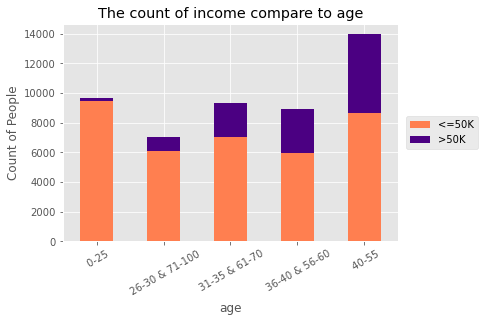

In [21]:
# compare age to the number of people
plot_visual(['age_bin'])

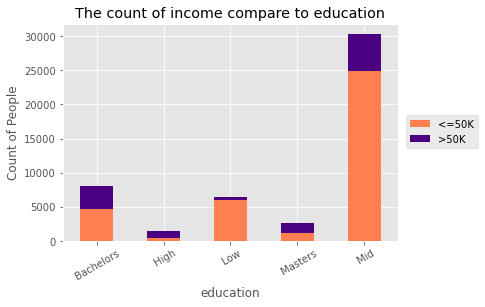

In [22]:
# compare education to the number of people
plot_visual(['education_bin'])

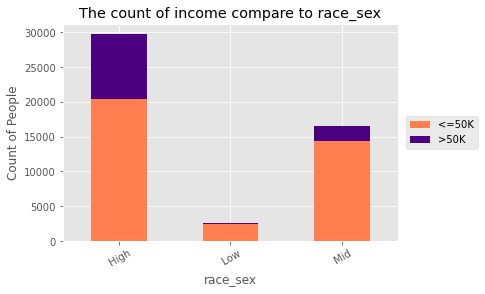

In [23]:
# compare race to the number of people
plot_visual(['race_sex_bin'])

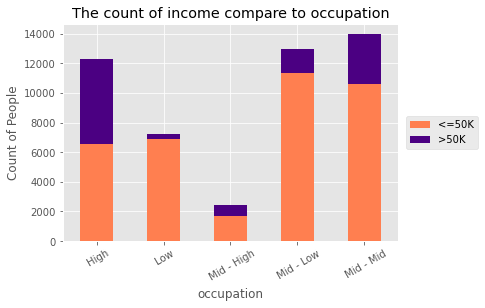

In [24]:
# compare occupation to the number of people
plot_visual(['occupation_bin'])

## 2. Finding Optimal Value of a key Ensemble Method Hyper-parameter
For Ensemble Models, one of the key hyper-parameter is number of "estimators". <br>
Find its best value by creating the line graphs for:
* Accuracy VS n_estimators
* AUC VS n_estimators

In [25]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score,f1_score

In [26]:
# Import RandomForest Classifier to run Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Import roc and auc curve calculations packages
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [28]:
accuracy_test = []
auc_test = []

# set the number of estimators from 0 to 100:
for n in range (1, 101):
    model = RandomForestClassifier(n_estimators=n, max_features='auto',random_state=101)
    model.fit(X_train,y_train)

    # set a prediction for the default dataset
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # calculate the accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # append to the lists
    accuracy_test.append(round(accuracy,5))
    auc_test.append(round(auc,5))


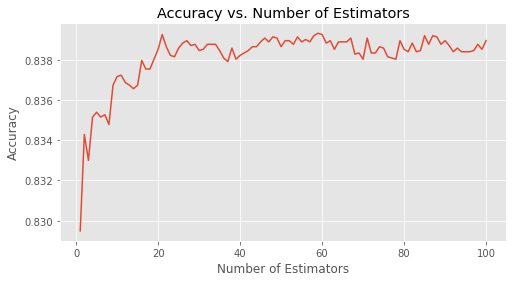

In [29]:
# Plot a Accuracy VS. number of estimators line graph:

plt.figure(figsize = (8,4))

list = np.arange(1,101)
plt.plot(list, accuracy_test)
plt.title("Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

plt.show()

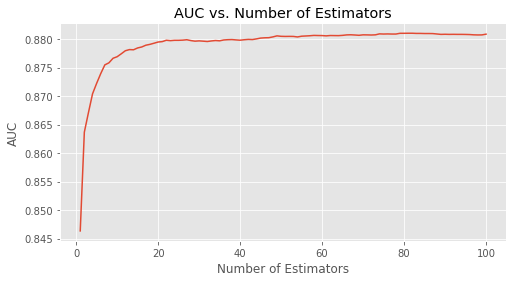

In [30]:
# Plot a AUC VS. number of estimators line graph:

plt.figure(figsize = (8,4))

list = np.arange(1,101)
plt.plot(list, auc_test)
plt.title("AUC vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")

plt.show()

In [31]:
# check performance

# Use a Classifier report to check the performance

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.69      0.58      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.75      0.76     16281
weighted avg       0.83      0.84      0.83     16281



## 3. Building a Random Forest Model

In [32]:
accuracy_rf = []
auc_rf = []

# set the number of estimators:
n_estimators = [50,100,150,200,250,300,350,400,450,500]


for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, max_features='auto',random_state=101)
    model.fit(X_train,y_train)

    # set a prediction for the default dataset
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # calculate the accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # append to the lists
    accuracy_rf.append(round(accuracy,5))
    auc_rf.append(round(auc,5))

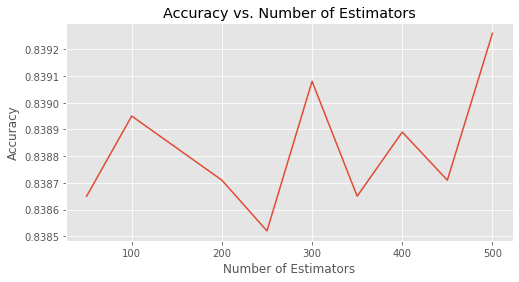

In [33]:
# Plot a Accuracy VS. number of estimators line graph:

plt.figure(figsize = (8,4))


plt.plot(n_estimators, accuracy_rf)
plt.title("Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

plt.show()

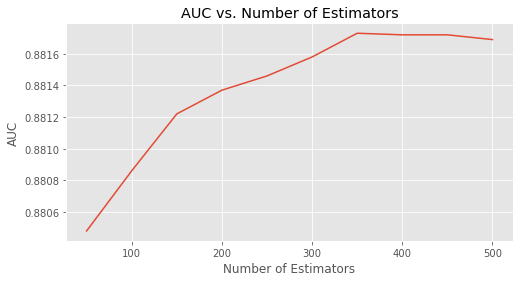

In [34]:
# Plot a Accuracy VS. number of estimators line graph:

plt.figure(figsize = (8,4))

list = np.arange(1,101)
plt.plot(n_estimators, auc_rf)
plt.title("AUC vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")

plt.show()

Write your observations about the Classifier's Behavior with respect to the number of estimators


Is there an optimal value of the estimator within the given range?

## 4. Building AdaBoost, Gradient Boost, and XGB

AdaBoost

In [35]:
# import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

In [36]:
#  Create empty lists of accuracy and AUC
accuracy_adab = []
auc_adab = []

n_estimators = [50,100,150,200,250,300,350,400,450,500]

for n in n_estimators:
    model = AdaBoostClassifier(n_estimators = n, random_state =101)
    model.fit(X_train, y_train.values.ravel())
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    # Append results to list
    accuracy_adab.append(accuracy)
    auc_adab.append(auc)

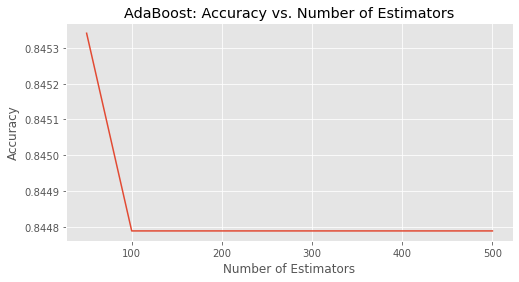

In [37]:
# Plot a Accuracy VS. number of estimators line graph:

plt.figure(figsize = (8,4))


plt.plot(n_estimators, accuracy_adab)
plt.title("AdaBoost: Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

plt.show()

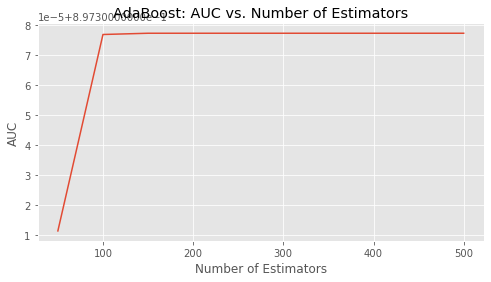

In [38]:
# Plot a Accuracy VS. number of estimators line graph:

plt.figure(figsize = (8,4))

list = np.arange(1,101)
plt.plot(n_estimators, auc_adab)
plt.title("AdaBoost: AUC vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")

plt.show()

Write your observations about the Classifier's Behavior with respect to the number of estimators

Is there an optimal value of the estimator within the given range?

Gradient Boost

In [39]:
# import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
#  Create empty lists of accuracy and AUC

accuracy_gb = []
auc_gb = []

n_estimators = [50,100,150,200,250,300,350,400,450,500]

for n in n_estimators:
    model = GradientBoostingClassifier(n_estimators = n, random_state =101)
    model.fit(X_train, y_train.values.ravel())
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    # Append results to list
    accuracy_gb.append(accuracy)
    auc_gb.append(auc)

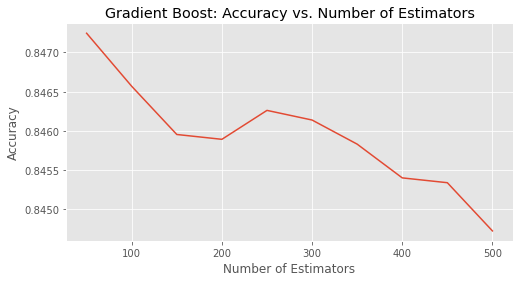

In [41]:
# Plot a Accuracy VS. number of estimators line graph:

plt.figure(figsize = (8,4))


plt.plot(n_estimators, accuracy_gb)
plt.title("Gradient Boost: Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

plt.show()

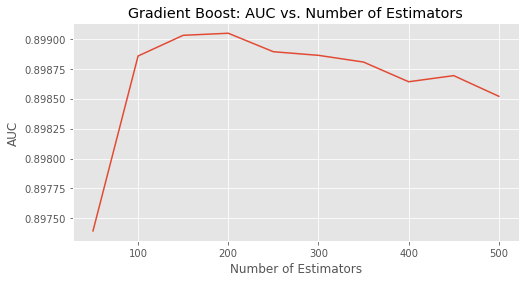

In [42]:
# Plot a Accuracy VS. number of estimators line graph:

plt.figure(figsize = (8,4))

list = np.arange(1,101)
plt.plot(n_estimators, auc_gb)
plt.title("Gradient Boost: AUC vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")

plt.show()

Write your observations about the Classifier's Behavior with respect to the number of estimators

Is there an optimal value of the estimator within the given range?

XGB

In [43]:
# pip install xgboost

In [44]:
# import this xgboost package
from xgboost import XGBClassifier as xgb

In [45]:
#  Create empty lists of accuracy and AUC

accuracy_xgb = []
auc_xgb = []

n_estimators = [50,100,150,200,250,300,350,400,450,500]

for n in n_estimators:
    model = xgb(n_estimators = n, random_state =101)
    model.fit(X_train, y_train.values.ravel())
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    # Append results to list
    accuracy_xgb.append(accuracy)
    auc_xgb.append(auc)

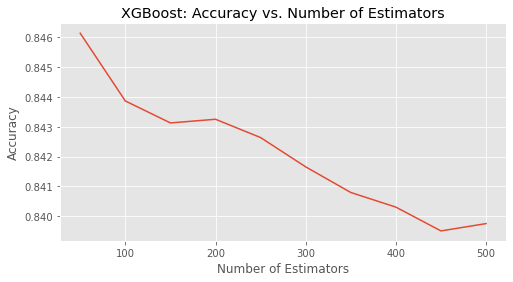

In [46]:
# Plot a Accuracy VS. number of estimators line graph:

plt.figure(figsize = (8,4))


plt.plot(n_estimators, accuracy_xgb)
plt.title("XGBoost: Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

plt.show()

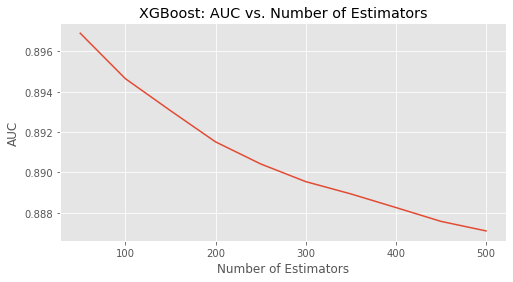

In [47]:
# Plot a Accuracy VS. number of estimators line graph:

plt.figure(figsize = (8,4))

list = np.arange(1,101)
plt.plot(n_estimators, auc_xgb)
plt.title("XGBoost: AUC vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")

plt.show()

Write your observations about the Classifier's Behavior with respect to the number of estimators

Is there an optimal value of the estimator within the given range?

## 5. Compare Performance
For the best values of Accuracy and AUC for four models:

In [48]:
best_model = pd.DataFrame({
    'Random Forest':[max(accuracy_rf), max(auc_rf)],
    'AdaBoost': [max(accuracy_adab),max(auc_adab)],
    'Gradient Boost': [max(accuracy_gb),max(auc_gb)],
    'XGB':[max(accuracy_xgb),max(auc_xgb)]},
    index = ['Accuracy','AUC']
    )

In [49]:
best_model

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.83926,0.845341,0.847245,0.846140
AUC,0.88173,0.897377,0.899046,0.896892
